# Modeling Rd. 2
---
This round I wanted to subset my data into four distinct categories ordered by number of posts.

## Imports

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Text Processing
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Load in the data

In [2]:
df = pd.read_csv('../data/clean_mbti_df.csv')
df.head()

,type,posts,no. of. words
0,INFJ,enfp intj moments sportscenter plays...,344
1,ENTP,finding lack these posts very alarming ...,639
2,INTP,good course which know thats bles...,215
3,INTJ,dear intp enjoyed conversation other e...,611
4,ENTJ,youre fired thats another silly misconcepti...,315


In [3]:
df['type'].value_counts(normalize=True)

INFP    0.209578
INFJ    0.169867
INTP    0.151849
INTJ    0.127193
ENTP    0.078947
ENFP    0.075273
ISTP    0.038762
ISFP    0.031532
ENTJ    0.026671
ISTJ    0.023945
ENFJ    0.021219
ISFJ    0.019440
ESTP    0.010550
ESFP    0.005571
ESFJ    0.004979
ESTJ    0.004623
Name: type, dtype: float64

As you can see above, nearly half of our data is represented in the top four classes starting with the most prevalent class, 'INFP'. I plan to run a another round of modeling splitting the types category into groups of four in descending order of number of posts. I will split the categories into a heavy class, upper class, lower class, and finally a light class to extract more insight from this dataset.

As I said before, I chose not to impute these values to have balanced classes so this will serve as a work around.

## Heavy Class Modeling
---
Heavy Class will include the top four categories with most the data ('INFP', 'INFJ', 'INTP', 'INTJ')

## Feature Engineering

In [4]:
# Use this bit of code to prevent long error messages, but be mindful that you may not see a message worth looking into when debugging code

import warnings
warnings.filterwarnings("ignore")

### Subsetting into heavy class

In [5]:
# Subsetting the heavy class

heavy_class = ['INFP','INFJ','INTP', 'INTJ']

heavy_sample = df[df['type'].isin(heavy_class)]

print(heavy_sample.type.unique())

print(heavy_sample.shape)

['INFJ' 'INTP' 'INTJ' 'INFP']
(5555, 3)


### Splitting data into X and y

#### Binarizing target variables

Binarizing target classes using LabelEncoder to convert categorical variables into a numeric form. Can very well accomplish using .map, .getdummies, .where functions. Utilizing a new tool to show yet another method of binarizing variables.

In [6]:
# Binarizing MBTI personality types(target feature) using LabelEncoder

encoder = LabelEncoder()
heavy_sample['class'] = encoder.fit_transform(heavy_sample['type'])

# Defining y (target feature)
y = heavy_sample['class']

In [7]:
# Making sure that label encoding successully binarized type column

heavy_sample.head()

,type,posts,no. of. words,class
0,INFJ,enfp intj moments sportscenter plays...,344,0
2,INTP,good course which know thats bles...,215,3
3,INTJ,dear intp enjoyed conversation other e...,611,2
5,INTJ,science perfect scientist claims tha...,189,2
6,INFJ,cant draw nails haha those were done pr...,775,0


In [8]:
print(heavy_sample['class'].unique())

[0 3 2 1]


Great! Now there are 4 target features!

In [9]:
# Checking to see the class distributions. The heavy class is still imbalanced but significantly less so than the original dataframe.
heavy_sample['type'].value_counts(normalize=True)

INFP    0.318272
INFJ    0.257966
INTP    0.230603
INTJ    0.193159
Name: type, dtype: float64

### CountVectorizer

In [10]:
# Preparing posts for model by vectorzing and filtering stop-words

cvec = CountVectorizer(stop_words='english')

X = cvec.fit_transform(heavy_sample['posts'])

In [11]:
# pre-vectorized shape
pre_vect = heavy_sample.shape
# post-vectorized shape
post_vect = X.shape

print(f'Pre-Vectorized Shape: {pre_vect}')
print(f'Post-Vectorized Shape: {post_vect}')

Pre-Vectorized Shape: (5555, 4)
Post-Vectorized Shape: (5555, 79508)


### Train Test Split

In [12]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, stratify=y, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(4444, 79508) (4444,) (1111, 79508) (1111,)


In [13]:
# Starting an accuracies list here so I can compare the accuracies of all models by the end of the first round

accuracies = {}


### Logistic Regression
---

In [14]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Logistic Regression'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       287
           1       0.66      0.73      0.69       353
           2       0.64      0.64      0.64       215
           3       0.68      0.63      0.65       256

    accuracy                           0.66      1111
   macro avg       0.66      0.66      0.66      1111
weighted avg       0.66      0.66      0.66      1111



In [15]:
logreg_train = logreg.score(X_train, y_train)

logreg_test = logreg.score(X_test, y_test)

In [16]:
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.6642664266426642


### Multinomial Naive Bayes
---

In [17]:
# Instantiate the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions
preds = nb.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Multinomial Naive bayes'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       287
           1       0.55      0.80      0.65       353
           2       0.71      0.33      0.46       215
           3       0.62      0.57      0.59       256

    accuracy                           0.60      1111
   macro avg       0.63      0.57      0.57      1111
weighted avg       0.62      0.60      0.58      1111



In [18]:
nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

In [19]:
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')

Training Accuracy:  0.9423942394239424
Testing Accuracy:  0.5958595859585959


### K Nearest Neighbors Classifier
---

In [20]:
# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions
preds = knn.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['KNN'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.32      0.50      0.39       287
           1       0.41      0.61      0.49       353
           2       0.52      0.11      0.18       215
           3       0.53      0.18      0.27       256

    accuracy                           0.39      1111
   macro avg       0.45      0.35      0.34      1111
weighted avg       0.44      0.39      0.36      1111



In [21]:
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

In [22]:
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')

Training Accuracy:  0.5974347434743474
Testing Accuracy:  0.38883888388838883


### Randon Forest Classifier
---

In [23]:
# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Random Forest'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       287
           1       0.49      0.90      0.64       353
           2       0.74      0.27      0.40       215
           3       0.69      0.43      0.53       256

    accuracy                           0.56      1111
   macro avg       0.63      0.52      0.53      1111
weighted avg       0.62      0.56      0.54      1111



In [24]:
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

In [25]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.5625562556255626


### Model Evaluation
---

In [26]:
# Model Scores
print(" Logistic Regression ".center(18, "="))
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')
print()
print(" Multinomial Naive Bayes ".center(18, "="))
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')
print()
print(" K Nearest Neighbors Classifier ".center(18, "="))
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')
print()
print(" Random Forest Classifier ".center(18, "="))
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

 Logistic Regression 
Training Accuracy:  1.0
Testing Accuracy:  0.6642664266426642

 Multinomial Naive Bayes 
Training Accuracy:  0.9423942394239424
Testing Accuracy:  0.5958595859585959

 K Nearest Neighbors Classifier 
Training Accuracy:  0.5974347434743474
Testing Accuracy:  0.38883888388838883

 Random Forest Classifier 
Training Accuracy:  1.0
Testing Accuracy:  0.5625562556255626


In [27]:
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])
accuracies_df

,Accuracies(%)
Logistic Regression,66.426643
Multinomial Naive bayes,59.585959
KNN,38.883888
Random Forest,56.255626


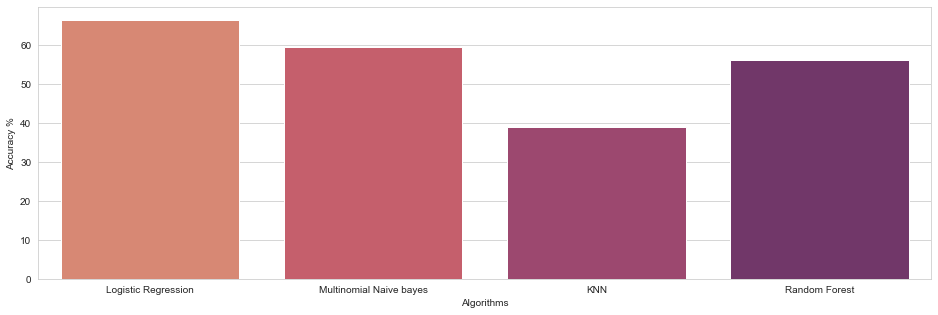

In [28]:
#colors = ["salmon", "blue", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='flare')
plt.show()

### saving heavy sample for next model tuning

In [29]:
heavy_sample.to_csv('../data/heavy_sample.csv', index = False)

## Upper Class Modeling
---
Upper Class will include the top four categories with the next most data ('ENTP', 'ENFP', 'ISTP', 'ISFP')

### Feature Engineering

### Subsetting into upper class

In [30]:
# Subsetting into upper class

upper_class = ['ENTP','ENFP','ISTP','ISFP']

upper_sample = df[df['type'].isin(upper_class)]

upper_sample.type.unique()

upper_sample.shape

(1894, 3)

### Splitting data into X and y 

#### Binarizing target variables

In [31]:
# Binarizing MBTI personality types(target feature) using LabelEncoder

encoder = LabelEncoder()
upper_sample['class'] = encoder.fit_transform(upper_sample['type'])

# Defining y (target feature)
y = upper_sample['class']

In [32]:
# Making sure that label encoding successully binarized type column

upper_sample.head()

,type,posts,no. of. words,class
1,ENTP,finding lack these posts very alarming ...,639,1
25,ENFP,doesnt want trip without staying behin...,305,0
26,ISFP,they paint without numbers guess istp ...,492,2
37,ENFP,enfps posted this thread philosophy board...,820,0
39,ISTP,from what read about enneagram thoug...,849,3


In [33]:
print(upper_sample['class'].unique())

[1 0 2 3]


Awesome! Now we have four target features!

In [34]:
# Checking to see the class distributions. The upper class is still imbalanced but significantly less so than the original dataframe.
upper_sample['type'].value_counts(normalize=True)

ENTP    0.351637
ENFP    0.335269
ISTP    0.172650
ISFP    0.140444
Name: type, dtype: float64

### CountVectorizer

In [35]:
# Preparing posts for model by vectorzing and filtering stop-words

cvec = CountVectorizer(stop_words='english')

X = cvec.fit_transform(upper_sample['posts'])

In [36]:
# pre-vectorized shape
pre_vect = upper_sample.shape
# post-vectorized shape
post_vect = X.shape

print(f'Pre-Vectorized Shape: {pre_vect}')
print(f'Post-Vectorized Shape: {post_vect}')

Pre-Vectorized Shape: (1894, 4)
Post-Vectorized Shape: (1894, 40908)


### Train Test Split

In [37]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, stratify=y, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(1515, 40908) (1515,) (379, 40908) (379,)


In [38]:
# Starting an accuracies list here so I can compare the accuracies of all models by the end of the first round

accuracies = {}

### Logistic Regression
---

In [39]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Logistic Regression'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       127
           1       0.82      0.80      0.81       133
           2       0.74      0.55      0.63        53
           3       0.80      0.68      0.74        66

    accuracy                           0.78       379
   macro avg       0.78      0.73      0.75       379
weighted avg       0.78      0.78      0.77       379



In [40]:
logreg_train = logreg.score(X_train, y_train)

logreg_test = logreg.score(X_test, y_test)

In [41]:
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.7757255936675461


### Multinomial Naive Bayes
---

In [42]:
# Instantiate the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions
preds = nb.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Multinomial Naive bayes'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       127
           1       0.59      0.77      0.67       133
           2       0.33      0.02      0.04        53
           3       0.73      0.29      0.41        66

    accuracy                           0.59       379
   macro avg       0.56      0.47      0.44       379
weighted avg       0.57      0.59      0.53       379



In [43]:
nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

In [44]:
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')

Training Accuracy:  0.932013201320132
Testing Accuracy:  0.5883905013192612


### K Nearest Neighbors Classifier
---

In [45]:
# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions
preds = knn.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['KNN'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.43      0.77      0.55       127
           1       0.48      0.42      0.45       133
           2       0.36      0.09      0.15        53
           3       0.32      0.09      0.14        66

    accuracy                           0.44       379
   macro avg       0.39      0.34      0.32       379
weighted avg       0.42      0.44      0.39       379



In [46]:
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

In [47]:
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')

Training Accuracy:  0.565016501650165
Testing Accuracy:  0.43535620052770446


### Random Forest
---

In [48]:
# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Random Forest'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       127
           1       0.63      0.80      0.70       133
           2       1.00      0.08      0.14        53
           3       0.81      0.20      0.32        66

    accuracy                           0.63       379
   macro avg       0.76      0.49      0.47       379
weighted avg       0.70      0.63      0.56       379



In [49]:
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

In [50]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.6253298153034301


### Model Evaluation
---

In [51]:
# Model Scores
print(" Logistic Regression ".center(18, "="))
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')
print()
print(" Multinomial Naive Bayes ".center(18, "="))
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')
print()
print(" K Nearest Neighbors Classifier ".center(18, "="))
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')
print()
print(" Random Forest Classifier ".center(18, "="))
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

 Logistic Regression 
Training Accuracy:  1.0
Testing Accuracy:  0.7757255936675461

 Multinomial Naive Bayes 
Training Accuracy:  0.932013201320132
Testing Accuracy:  0.5883905013192612

 K Nearest Neighbors Classifier 
Training Accuracy:  0.565016501650165
Testing Accuracy:  0.43535620052770446

 Random Forest Classifier 
Training Accuracy:  1.0
Testing Accuracy:  0.6253298153034301


In [52]:
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])
accuracies_df

,Accuracies(%)
Logistic Regression,77.572559
Multinomial Naive bayes,58.839050
KNN,43.535620
Random Forest,62.532982


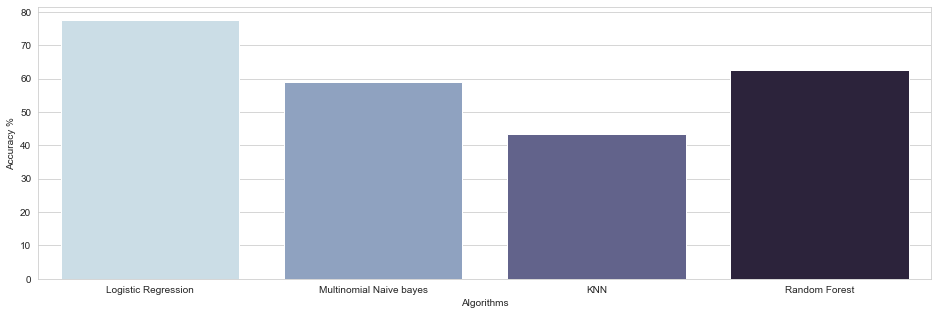

In [53]:
#colors = ["salmon", "blue", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='ch:s=.25,rot=-.25')
plt.show()

In [54]:
upper_sample.to_csv('../data/upper_sample.csv', index = False)

## Lower Class Modeling
---
Lower Class will include the top four categories with the next most data ('ENTJ', 'ISTJ', 'ENFJ', 'ISFJ')

### Feature Engineering

### Subsetting into lower class

In [55]:
# Subsetting into lower class

lower_class = ['ENTJ','ISTJ','ENFJ','ISFJ']

lower_sample = df[df['type'].isin(lower_class)]

lower_sample.type.unique()

lower_sample.shape

(770, 3)

### Splitting data into X and y

#### Binarizing target variables

In [56]:
# Binarizing MBTI personality types(target feature) using LabelEncoder

encoder = LabelEncoder()
lower_sample['class'] = encoder.fit_transform(lower_sample['type'])

# Defining y (target feature)
y = lower_sample['class']

In [57]:
# Making sure that label encoding successully binarized type column

lower_sample.head()

,type,posts,no. of. words,class
4,ENTJ,youre fired thats another silly misconcepti...,315,1
11,ENFJ,went through break some months wer...,267,0
23,ENTJ,still going strong just over year mark ha...,622,1
33,ENFJ,stuff like they longer become outlandi...,131,0
38,ENTJ,hello working presentation type part ...,19,1


In [58]:
print(lower_sample['class'].unique())

[1 0 2 3]


Fantastic! Four features now yay!

In [59]:
# Checking to see the class distributions. The lower class is still imbalanced but significantly less so than the original dataframe.
lower_sample['type'].value_counts(normalize=True)

ENTJ    0.292208
ISTJ    0.262338
ENFJ    0.232468
ISFJ    0.212987
Name: type, dtype: float64

### CountVectorizer

In [60]:
# Preparing posts for model by vectorzing and filtering stop-words

cvec = CountVectorizer(stop_words='english')

X = cvec.fit_transform(lower_sample['posts'])

In [61]:
# pre-vectorized shape
pre_vect = lower_sample.shape
# post-vectorized shape
post_vect = X.shape

print(f'Pre-Vectorized Shape: {pre_vect}')
print(f'Post-Vectorized Shape: {post_vect}')

Pre-Vectorized Shape: (770, 4)
Post-Vectorized Shape: (770, 24595)


### Train Test Split

In [62]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, stratify=y, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(616, 24595) (616,) (154, 24595) (154,)


In [63]:
# Starting an accuracies list here so I can compare the accuracies of all models by the end of the first round

accuracies = {}

## Logistic Regression
---

In [64]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Logistic Regression'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        36
           1       0.76      0.69      0.72        45
           2       0.59      0.58      0.58        33
           3       0.74      0.78      0.76        40

    accuracy                           0.69       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.69      0.69      0.69       154



In [65]:
logreg_train = logreg.score(X_train, y_train)

logreg_test = logreg.score(X_test, y_test)

In [66]:
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.6883116883116883


## Multinomial Naive Bayes
---

In [67]:
# Instantiate the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions
preds = nb.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Multinomial Naive bayes'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.82      0.39      0.53        36
           1       0.52      0.91      0.66        45
           2       0.86      0.18      0.30        33
           3       0.57      0.72      0.64        40

    accuracy                           0.58       154
   macro avg       0.69      0.55      0.53       154
weighted avg       0.68      0.58      0.55       154



In [68]:
nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

In [69]:
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')

Training Accuracy:  0.9935064935064936
Testing Accuracy:  0.5844155844155844


## K Nearest Neighbors Classifier
---

In [70]:
# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions
preds = knn.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['KNN'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.38      0.72      0.50        36
           1       0.62      0.18      0.28        45
           2       0.33      0.55      0.41        33
           3       0.59      0.25      0.35        40

    accuracy                           0.40       154
   macro avg       0.48      0.42      0.38       154
weighted avg       0.49      0.40      0.38       154



In [71]:
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

In [72]:
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')

Training Accuracy:  0.5584415584415584
Testing Accuracy:  0.4025974025974026


## Random Forest
---

In [73]:
# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Random Forest'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        36
           1       0.65      0.78      0.71        45
           2       0.65      0.33      0.44        33
           3       0.56      0.68      0.61        40

    accuracy                           0.62       154
   macro avg       0.63      0.61      0.60       154
weighted avg       0.63      0.62      0.61       154



In [74]:
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

In [75]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.6233766233766234


## Model Evaluation 
___

In [76]:
# Model Scores
print(" Logistic Regression ".center(18, "="))
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')
print()
print(" Multinomial Naive Bayes ".center(18, "="))
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')
print()
print(" K Nearest Neighbors Classifier ".center(18, "="))
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')
print()
print(" Random Forest Classifier ".center(18, "="))
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

 Logistic Regression 
Training Accuracy:  1.0
Testing Accuracy:  0.6883116883116883

 Multinomial Naive Bayes 
Training Accuracy:  0.9935064935064936
Testing Accuracy:  0.5844155844155844

 K Nearest Neighbors Classifier 
Training Accuracy:  0.5584415584415584
Testing Accuracy:  0.4025974025974026

 Random Forest Classifier 
Training Accuracy:  1.0
Testing Accuracy:  0.6233766233766234


In [77]:
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])
accuracies_df

,Accuracies(%)
Logistic Regression,68.831169
Multinomial Naive bayes,58.441558
KNN,40.259740
Random Forest,62.337662


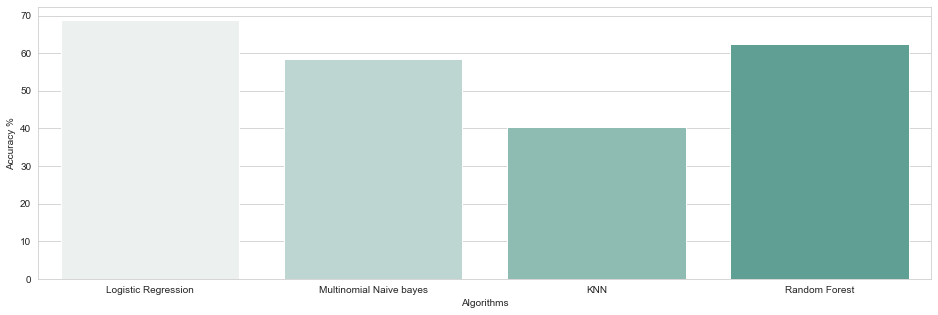

In [78]:
#colors = ["salmon", "blue", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='light:#5A9')
plt.show()

## Light Class Modeling
---
Light Class will include the bottom four categories with the least amount of data ('ESTP', 'ESFP', 'ESFJ', 'ESTJ')

### Feature Engineering

### Subsetting into light class

In [79]:
# Subsetting into lower class

light_class = ['ESTP','ESFP','ESFJ','ESTJ']

light_sample = df[df['type'].isin(light_class)]

light_sample.type.unique()

light_sample.shape

(217, 3)

### Splitting data into X and y

#### Binarizing target variables

In [80]:
# Binarizing MBTI personality types(target feature) using LabelEncoder

encoder = LabelEncoder()
light_sample['class'] = encoder.fit_transform(light_sample['type'])

# Defining y (target feature)
y = light_sample['class']

In [81]:
# Making sure that label encoding successully binarized type column

light_sample.head()

,type,posts,no. of. words,class
110,ESTP,splinter cell blacklist xbox estps gener...,67,3
155,ESTP,night just moved here from about year...,217,3
194,ESFP,edit forgot what board this currently ...,381,1
331,ESTP,know yourre estp when yourre cooler than ot...,172,3
376,ESTP,thank reading sorry really long really...,530,3


In [82]:
print(light_sample['class'].unique())

[3 1 2 0]


Magnificent! We now have the four features with the least amount of posts.

In [83]:
# Checking to see the class distributions. The light class is still imbalanced but significantly less so than the original dataframe.
light_sample['type'].value_counts(normalize=True)

ESTP    0.410138
ESFP    0.216590
ESFJ    0.193548
ESTJ    0.179724
Name: type, dtype: float64

### CountVectorizer

In [84]:
# Preparing posts for model by vectorzing and filtering stop-words

cvec = CountVectorizer(stop_words='english')

X = cvec.fit_transform(light_sample['posts'])

In [85]:
# pre-vectorized shape
pre_vect = light_sample.shape
# post-vectorized shape
post_vect = X.shape

print(f'Pre-Vectorized Shape: {pre_vect}')
print(f'Post-Vectorized Shape: {post_vect}')

Pre-Vectorized Shape: (217, 4)
Post-Vectorized Shape: (217, 11774)


### Train Test Split

In [86]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, stratify=y, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(173, 11774) (173,) (44, 11774) (44,)


In [87]:
# Starting an accuracies list here so I can compare the accuracies of all models by the end of the first round

accuracies = {}

## Logistic Regression
---

In [88]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Logistic Regression'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.44      0.40      0.42        10
           2       0.40      0.25      0.31         8
           3       0.62      0.89      0.73        18

    accuracy                           0.57        44
   macro avg       0.55      0.48      0.49        44
weighted avg       0.56      0.57      0.54        44



In [89]:
logreg_train = logreg.score(X_train, y_train)

logreg_test = logreg.score(X_test, y_test)

In [90]:
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.5681818181818182


## Multinomial Naive Bayes
---

In [91]:
# Instantiate the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions
preds = nb.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Multinomial Naive bayes'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.00      0.00      0.00        10
           2       0.50      0.12      0.20         8
           3       0.44      0.94      0.60        18

    accuracy                           0.43        44
   macro avg       0.36      0.30      0.25        44
weighted avg       0.36      0.43      0.32        44



In [92]:
nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

In [93]:
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')

Training Accuracy:  0.976878612716763
Testing Accuracy:  0.4318181818181818


## K Nearest Neighbors Classifier
---

In [94]:
# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions
preds = knn.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['KNN'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.31      0.40      0.35        10
           2       0.00      0.00      0.00         8
           3       0.54      0.72      0.62        18

    accuracy                           0.43        44
   macro avg       0.30      0.34      0.31        44
weighted avg       0.35      0.43      0.38        44



In [95]:
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

In [96]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.6233766233766234


## Random Forest
---

In [97]:
# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Random Forest'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.45      1.00      0.62        18

    accuracy                           0.45        44
   macro avg       0.24      0.31      0.24        44
weighted avg       0.27      0.45      0.31        44



In [98]:
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

In [99]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.45454545454545453


## Model Evaluation
---

In [100]:
# Model Scores
print(" Logistic Regression ".center(18, "="))
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')
print()
print(" Multinomial Naive Bayes ".center(18, "="))
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')
print()
print(" K Nearest Neighbors Classifier ".center(18, "="))
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')
print()
print(" Random Forest Classifier ".center(18, "="))
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

 Logistic Regression 
Training Accuracy:  1.0
Testing Accuracy:  0.5681818181818182

 Multinomial Naive Bayes 
Training Accuracy:  0.976878612716763
Testing Accuracy:  0.4318181818181818

 K Nearest Neighbors Classifier 
Training Accuracy:  0.5549132947976878
Testing Accuracy:  0.4318181818181818

 Random Forest Classifier 
Training Accuracy:  1.0
Testing Accuracy:  0.45454545454545453


In [101]:
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])
accuracies_df

,Accuracies(%)
Logistic Regression,56.818182
Multinomial Naive bayes,43.181818
KNN,43.181818
Random Forest,45.454545


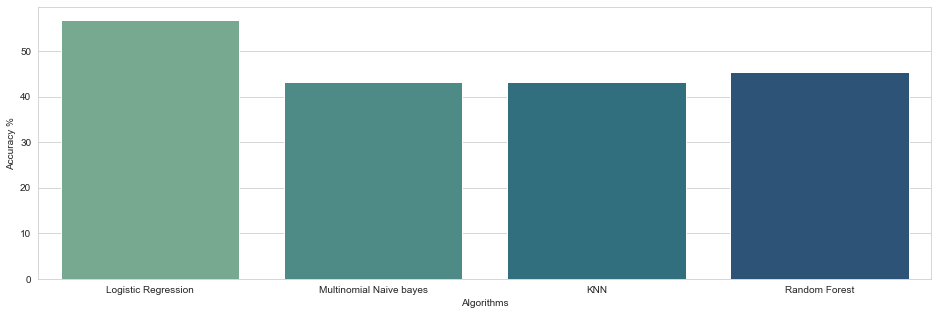

In [102]:
#colors = ["salmon", "blue", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='crest')
plt.show()